# **Project 3**, APS1070 Winter 2022
#### **PCA [14 marks]**
**Deadline: March 11th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Yunjie Xu
*   **Student number**: 1008601951



### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



In this project we work on a Covid-19 dataset that reports the number of confirmed cases per day and Fashion MNIST.

# Part 1: Getting started [2 Marks]

In [1]:
## Import package

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS_COVID_Jan22.csv',
    index_col=0,
    thousands=','
)

In [3]:
# Create a data frame
df = cases_raw.T
df.index = pd.to_datetime(df.index)
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,US,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,5,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,159070,239129,228918,29888,94779,5741,7446626,348708,2022581,1503668,...,543166,68684431,208271,7,461059,2078087,478084,10449,299172,226887
2022-01-20,159303,241512,230470,32201,95220,5741,7576335,349329,2086522,1505501,...,556163,69329860,209578,7,463145,2094802,479343,10507,299971,227552
2022-01-21,159516,244182,232325,33025,95676,5815,7694506,349957,2129688,1530919,...,569037,70209840,210899,7,465463,2110737,480583,10585,300587,227961
2022-01-22,159548,246412,234536,33025,95902,5931,7792652,350897,2196870,1577588,...,580066,70495874,212289,7,467864,2126444,480583,10585,301203,228179


1. Write a function to do the following: **[0.5]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.5]**

In [4]:
### YOUR CODE HERE ###

## Part_1.1

def PlotTimeSeries(df,Country_list):
    
    fig, axs = plt.subplots(len(Country_list), 1,  figsize = (10,15), dpi = 100)
    
    i=0
    for j in range(len(Country_list)):
            df[Country_list[i]].plot(ax = axs[j])
            axs[j].set_title(Country_list[i])    
            i = i + 1

In [5]:
## Part_1.2
# Apply StandardScalar to the data. Each day should have a mean of zero and a StD of 1.

X_std = StandardScaler().fit_transform(df.T.values)
df_std = pd.DataFrame(X_std.T,columns = df.columns, index = df.index)
df_std.index = pd.to_datetime(df_std.index)

In [6]:
print(np.mean(df_std.values[-3,:]))
print(np.std(df_std.values[-5,:]))

2.5489814340883697e-18
1.0


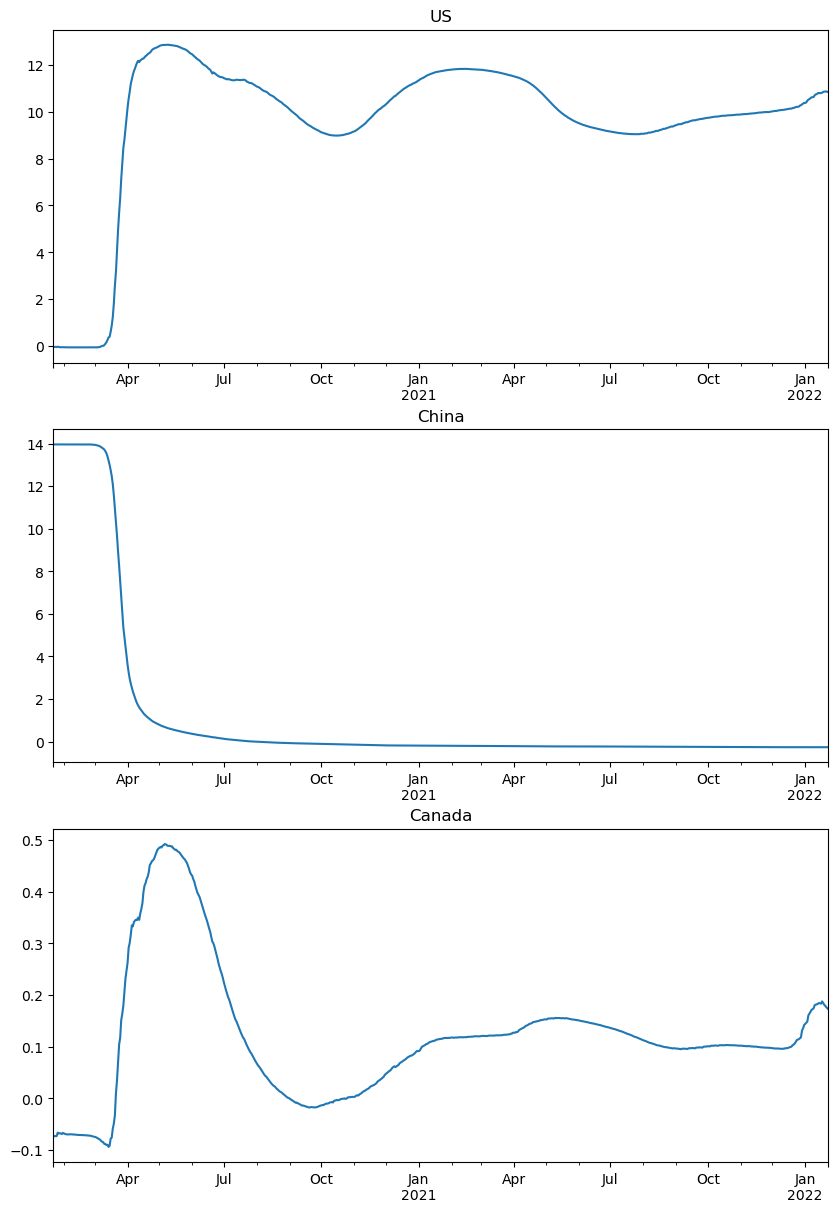

In [7]:
## Part_1.3
# Run the function in step 1 on the standardized dataset for the US, China, and Canada.
PlotTimeSeries(df_std,['US', 'China', 'Canada'])

In [8]:
# Part_1.4
'''
For China, the curve initially started at a very high level, then went down steeply and remains flat; 
For the US, the curve sharply increased to an extremely high level at the beginning of a few months 
in 2020, then the curve drops slightly, but the US's curve still fluctuated at a very high level; For 
Canada, the curve was similar with the US at an early stage. But, the curve drops dramatically to a 
relatively very low level then goes up smoothly.

The country's curve goes up/down means that the relative confirmed cases in this country are increasing/decreasing. 
The negative number does not mean the number of covid cases is negative, which means the average minus the number 
of standards deviations of cases. Thus if the number is -1, it means in this country, at a certain time point, the 
confirmed cases are average cases in the world minus one standards deviation of cases in the world. Thus if the number
is positive, it means the country's confirmed cases are more than the average value of the world.
'''

"\nFor China, the curve initially started at a very high level, then went down steeply and remains flat; \nFor the US, the curve sharply increased to an extremely high level at the beginning of a few months \nin 2020, then the curve drops slightly, but the US's curve still fluctuated at a very high level; For \nCanada, the curve was similar with the US at an early stage. But, the curve drops dramatically to a \nrelatively very low level then goes up smoothly.\n\nThe country's curve goes up/down means that the relative confirmed cases in this country are increasing/decreasing. \nThe negative number does not mean the number of covid cases is negative, which means the average minus the number \nof standards deviations of cases. Thus if the number is -1, it means in this country, at a certain time point, the \nconfirmed cases are average cases in the world minus one standards deviation of cases in the world. Thus if the number\nis positive, it means the country's confirmed cases are more t

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (733, 733).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(Bars for each componenet and a line to show cumulative --similar to tutoriual. Limit x-axis if needed to better see the plot). **[0.25]**
4. How many PCs do you need to cover 98% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [9]:
### YOUR CODE HERE ###
# Part_2.1

n, m = df.values.shape

# Compute covariance matrix
C = np.dot(df.values, df.values.T) / (m-1) 
C,C.shape # The dimensions of your covariance matrix should be (733, 733).

(array([[1.54013846e+03, 1.80711282e+03, 2.58559487e+03, ...,
         7.66864272e+05, 7.69288954e+05, 7.71470523e+05],
        [1.80711282e+03, 2.12039487e+03, 3.03383590e+03, ...,
         8.47843590e+05, 8.50477077e+05, 8.52906682e+05],
        [2.58559487e+03, 3.03383590e+03, 4.34083590e+03, ...,
         1.56080747e+06, 1.56910844e+06, 1.57601052e+06],
        ...,
        [7.66864272e+05, 8.47843590e+05, 1.56080747e+06, ...,
         4.29217276e+13, 4.31834679e+13, 4.33358162e+13],
        [7.69288954e+05, 8.50477077e+05, 1.56910844e+06, ...,
         4.31834679e+13, 4.34475874e+13, 4.36013514e+13],
        [7.71470523e+05, 8.52906682e+05, 1.57601052e+06, ...,
         4.33358162e+13, 4.36013514e+13, 4.37562120e+13]]),
 (733, 733))

In [10]:
# Part_2.2

def get_sorted_eigen(df):
    
    X = df.values.T
    n, m = X.shape
    # Compute covariance matrix
    C = np.dot(X.T,X) / (n-1) 
    # Eigen decomposition
    eigenValues, eigenVectors = np.linalg.eigh(C) 
    # Sort processing
    args = (-eigenValues).argsort()
    eigenValues = eigenValues[args]
    eigenVectors = eigenVectors[:, args]
    
    return C,eigenValues,eigenVectors

In [11]:
C,eigenValues,eigenVectors = get_sorted_eigen(df_std)

In [12]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

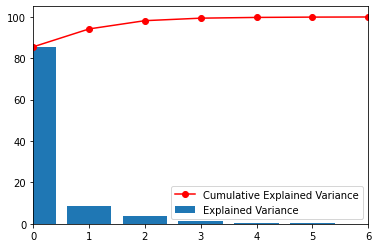

In [13]:
# Part_2.3

# Build scree plot
plt.bar(range(733), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.xlim(0,6)
plt.show()

In [14]:
# Part_2.4

n_PCs = (cumExpVar < 98).sum() + 1  
print(f'we need {n_PCs} PCs to cover 98% of the dataset variance.')

we need 3 PCs to cover 98% of the dataset variance.


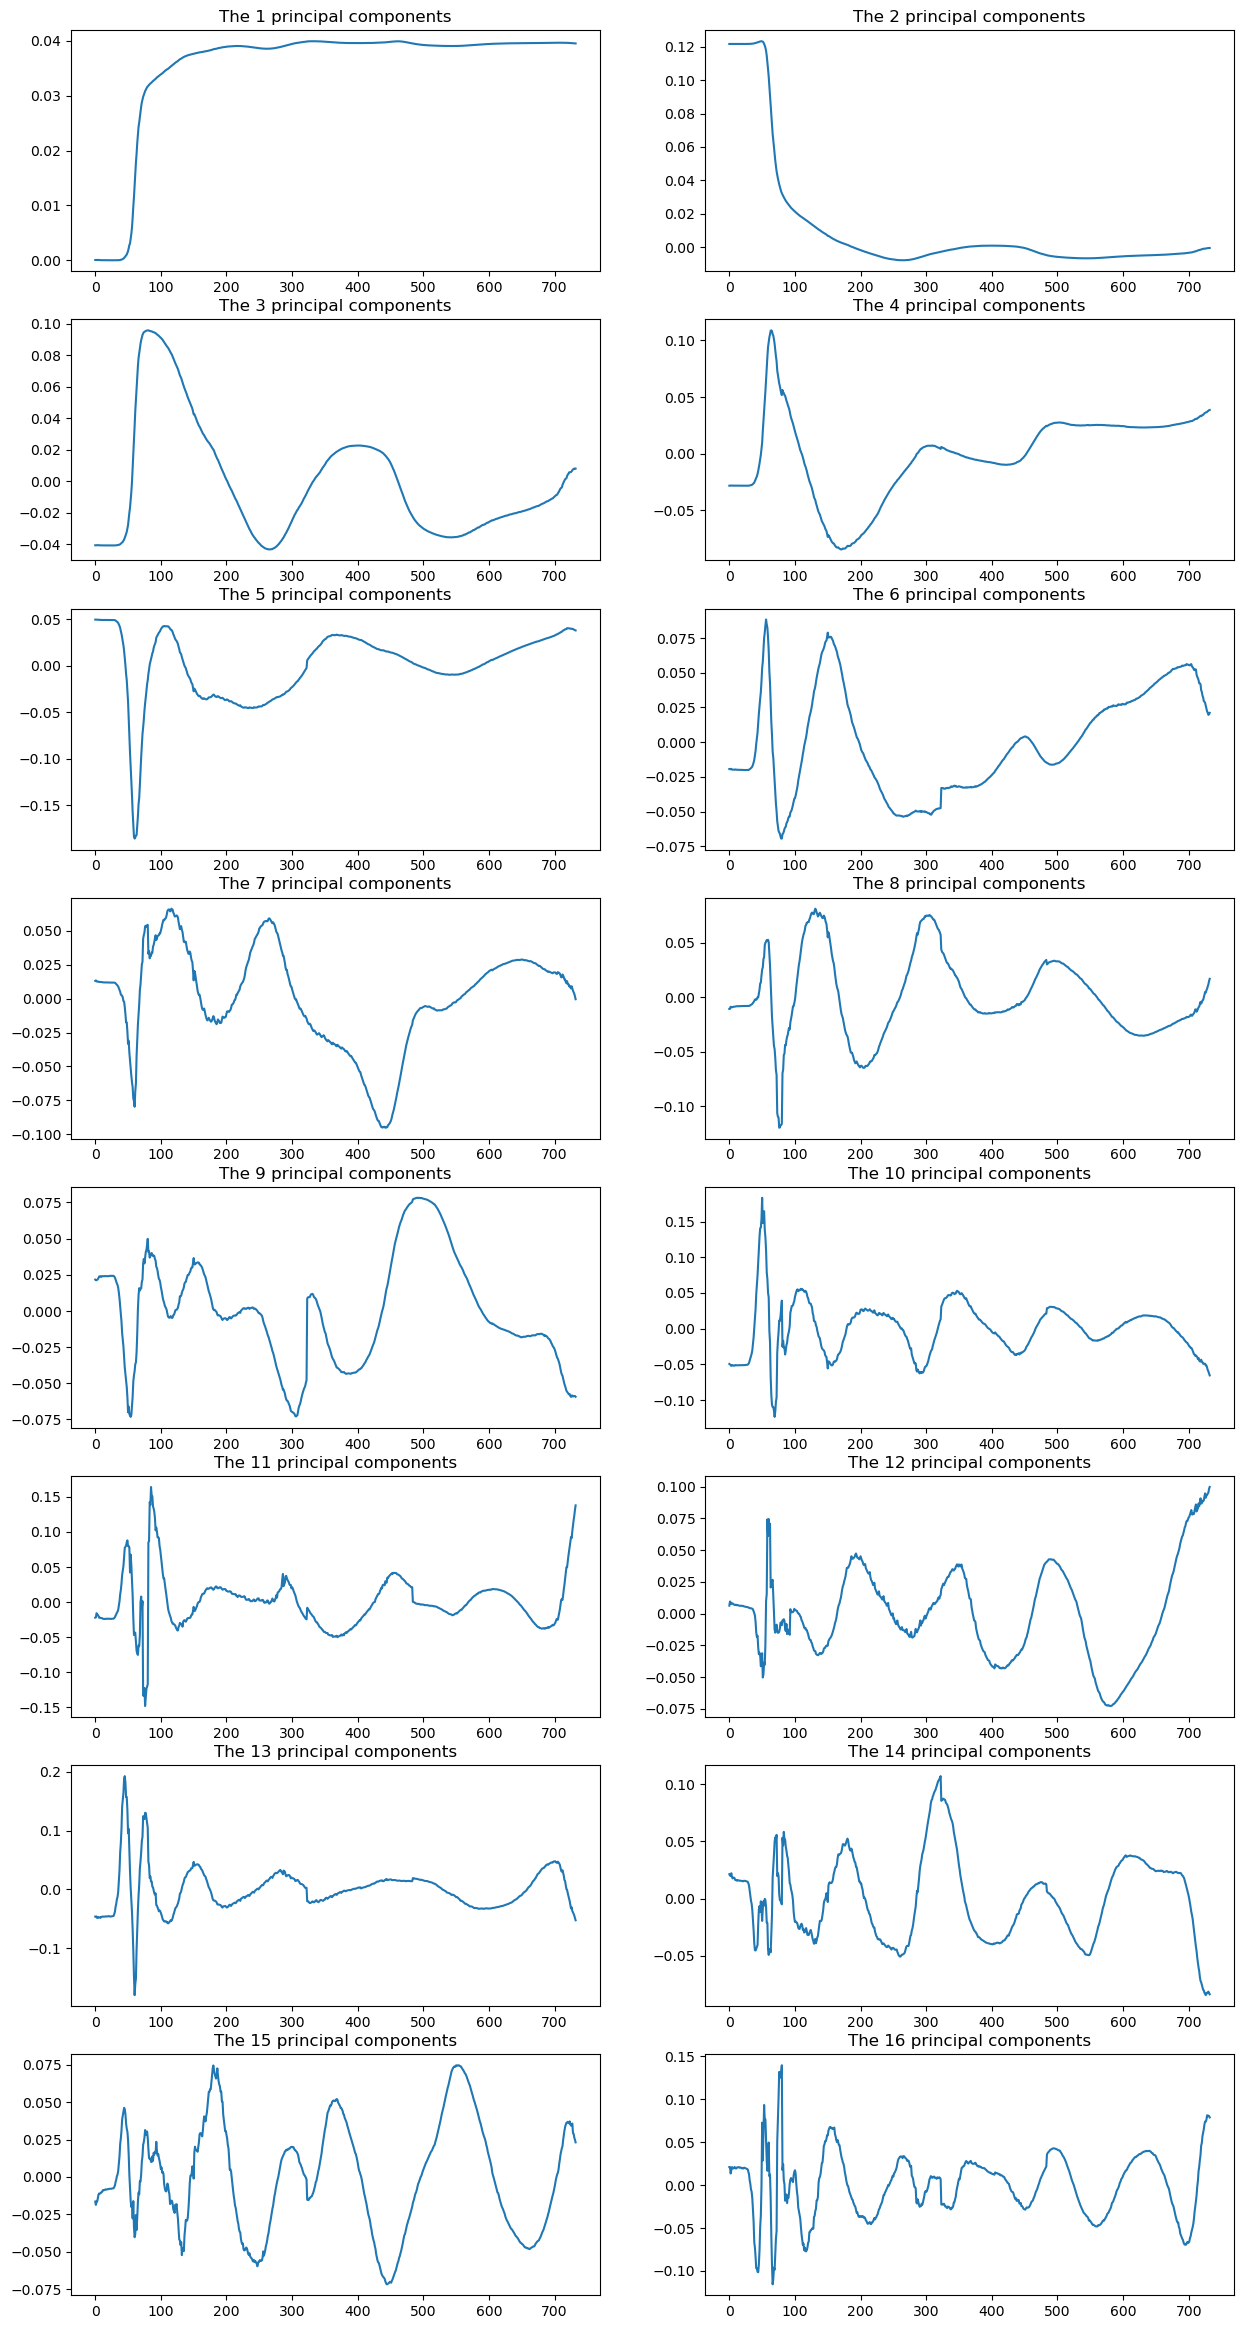

In [15]:
# Part_2.5

fig, axs = plt.subplots(8, 2, figsize = (15,30), dpi = 100)
k = 0 
for i in range(8):
    for j in range(2):
        axs[i,j].plot(eigenVectors[:,k])
        axs[i,j].set_title('The '+ str(k+1)+' principal components')
        k = k + 1

In [16]:
# Part_2.6
'''
The first and the second principal components are very steady than other components. If the component is more behind, 
then the component's curve has fluctuated more. That is because the first two components have already explained more 
than 90 percent of the variance in this dataset. Thus the later components will stand for the influences of some 
significant noises on the trend.
'''

"\nThe first and the second principal components are very steady than other components. If the component is more behind, \nthen the component's curve has fluctuated more. That is because the first two components have already explained more \nthan 90 percent of the variance in this dataset. Thus the later components will stand for the influences of some \nsignificant noises on the trend.\n"

# Part 3: Data reconstruction [4 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 100 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[1]**


In [17]:
### YOUR CODE HERE ###
def plot_country_figures(original_df, country_name):
    
    # Standardzing data
    SS = StandardScaler()
    X_std = SS.fit_transform(original_df.T.values)
    df_std = pd.DataFrame(X_std.T,columns = original_df.columns, index = original_df.index)
    df_std.index = pd.to_datetime(df_std.index)
    
    plt.figure(figsize = (16,12))

    ## 1. The original time-series for the specified country.
    plt.subplot(221)
    plt.plot(original_df[country_name])
    plt.title(country_name +' original time-series')
    
    ## 2. The incremental reconstruction of the original time-series 
    plt.subplot(222)
    
    # Compute eigenvalue and eigenvectors use pervious function
    C,eigenValues,eigenVectors = get_sorted_eigen(df_std)
    
    # Plot
    for i in [1,2,4,8,16]:
        W = eigenVectors[:,:i]
        projX = np.dot(df_std.T.values, W)
        ReconX = np.dot(projX, W.T)
        ReconX_orig = SS.inverse_transform(ReconX)
        df_reconstructed = pd.DataFrame(ReconX_orig.T ,columns = df.columns, index = df.index)
        df_reconstructed.index = pd.to_datetime(df_reconstructed.index)
        plt.plot(df_reconstructed[country_name],label = str(i) + " Components")
        plt.legend()
    plt.title(country_name + ' The incremental reconstruction of the original time-series')
    
    ## 3. The residual error for your best reconstruction with respect to the original time-series.
    plt.subplot(223)
    for i in [16]:
        W = eigenVectors[:,:i]
        projX = np.dot(df_std.T.values, W)
        ReconX = np.dot(projX, W.T)
        ReconX_orig = SS.inverse_transform(ReconX)
        df_residual = pd.DataFrame(df.values - ReconX_orig.T ,columns = df.columns, index = df.index)
        df_residual.index = pd.to_datetime(df_residual.index)
        plt.plot(df_residual[country_name],label = str(i) + " Components")
        plt.legend()
    plt.title(country_name +' residual error')
    
    ## 4. The RMSE of the reconstruction as a function of the number of included components
    plt.subplot(224)
    
    RMSEs = []
    for i in range(1,101):
        W = eigenVectors[:,:i]
        projX = np.dot(df_std.T.values, W)
        ReconX = np.dot(projX, W.T)
        ReconX_orig = SS.inverse_transform(ReconX)
        MSE = mean_squared_error(df.values, ReconX_orig.T )
        RMSE = MSE**0.5
        RMSEs.append(RMSE)
        
    plt.plot([i for i in range(1,101)],RMSEs) 
    plt.title(country_name +' RMSE')
    
    
    plt.show()

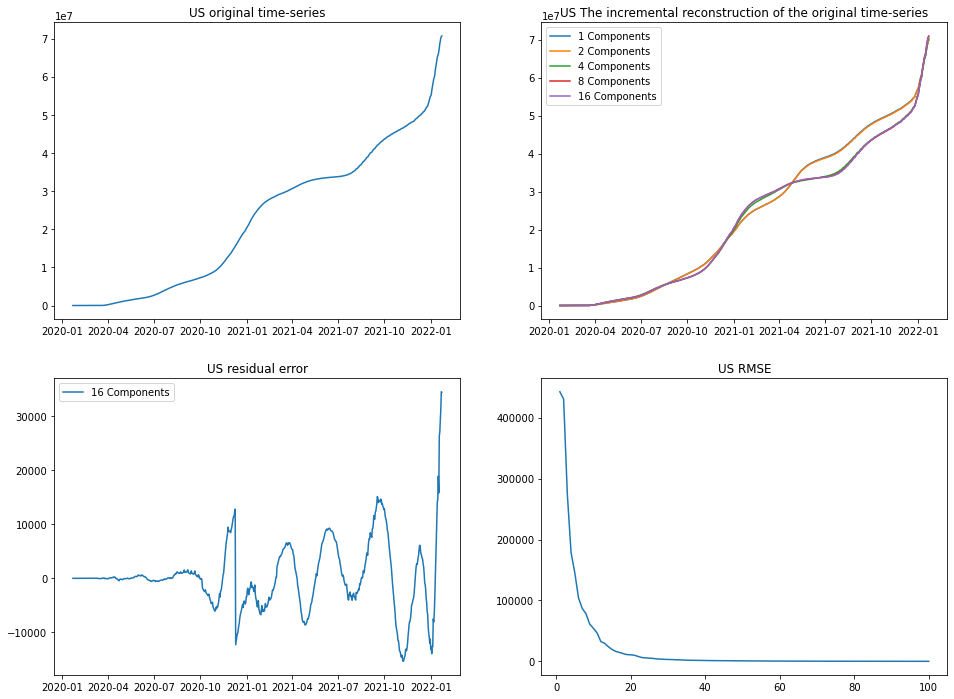

In [18]:
# Test function by 'US'
plot_country_figures(df, 'US')

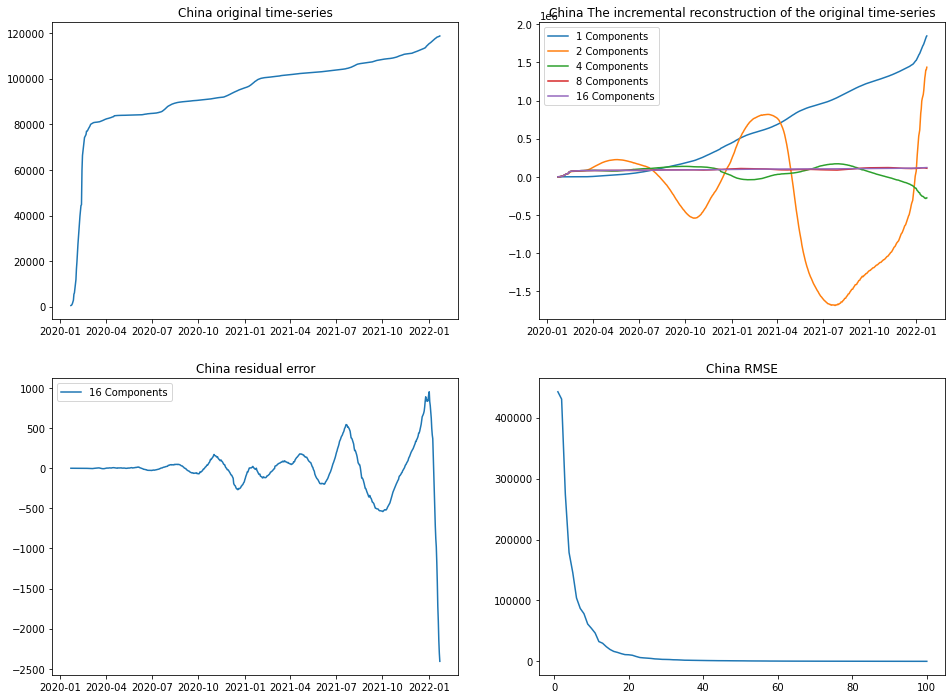

In [19]:
# Test function by 'China'
plot_country_figures(df, 'China')

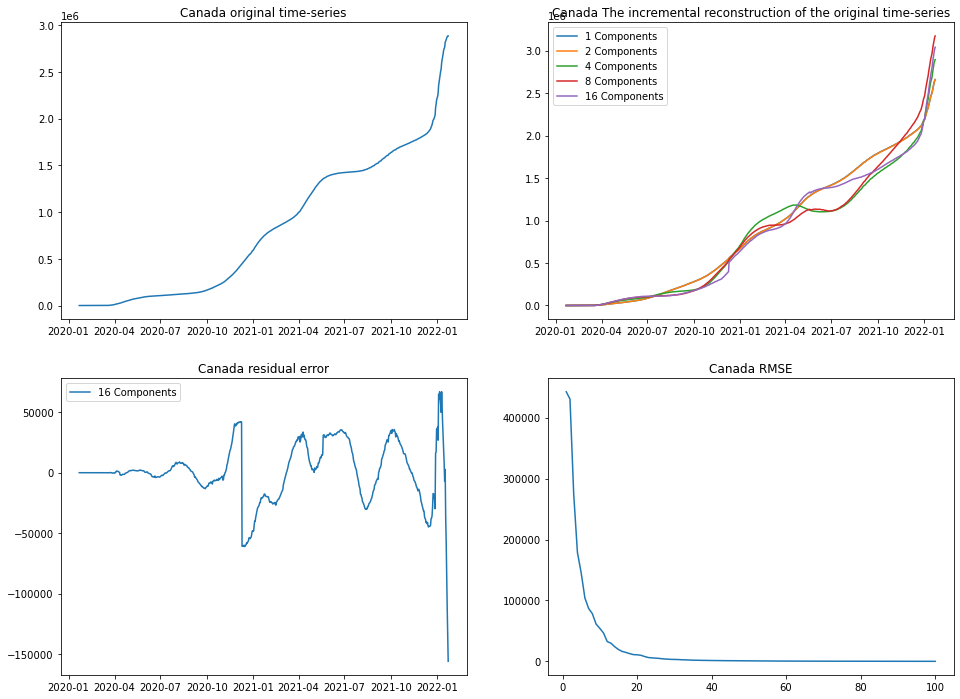

In [20]:
# Test function by 'Canada'
plot_country_figures(df, 'Canada')

# Part 4: SVD [3 Marks]
Modify your function in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.**[1]**


Repeat part 3 and compare your PCA and SVD results. **[1]**



In [21]:
### YOUR CODE HERE ###

#Yes.need standardization.

def plot_country_figures2(original_df, country_name):
    
    # Standardzing data
    SS = StandardScaler()
    X_std = SS.fit_transform(original_df.T.values)
    df_std = pd.DataFrame(X_std.T,columns = original_df.columns, index = original_df.index)
    df_std.index = pd.to_datetime(df_std.index)
    
    plt.figure(figsize = (16,12))

    ## 1. The original time-series for the specified country.
    plt.subplot(221)
    plt.plot(original_df[country_name])
    plt.title(country_name +' original time-series')
    
    ## 2. The incremental reconstruction of the original time-series 
    plt.subplot(222)
    
    # Compute eigenvalue and eigenvectors use pervious function by SVD
    u, s, vh = np.linalg.svd(df_std.T, full_matrices=True)
    eigenVectors = vh
    
    # Plot
    for i in [1,2,4,8,16]:
        W = eigenVectors[:i,:].T
        projX = np.dot(df_std.T.values, W)
        ReconX = np.dot(projX, W.T)
        ReconX_orig = SS.inverse_transform(ReconX)
        df_reconstructed = pd.DataFrame(ReconX_orig.T ,columns = df.columns, index = df.index)
        df_reconstructed.index = pd.to_datetime(df_reconstructed.index)
        plt.plot(df_reconstructed[country_name],label = str(i) + " Components")
        plt.legend()
    plt.title(country_name + ' The incremental reconstruction of the original time-series')
    
    ## 3. The residual error for your best reconstruction with respect to the original time-series.
    plt.subplot(223)
    for i in [16]:
        W = eigenVectors[:i,:].T
        projX = np.dot(df_std.T.values, W)
        ReconX = np.dot(projX, W.T)
        ReconX_orig = SS.inverse_transform(ReconX)
        df_residual = pd.DataFrame(df.values - ReconX_orig.T ,columns = df.columns, index = df.index)
        df_residual.index = pd.to_datetime(df_residual.index)
        plt.plot(df_residual[country_name],label = str(i) + " Components")
        plt.legend()
    plt.title(country_name +' residual error')
    
    ## 4. The RMSE of the reconstruction as a function of the number of included components
    plt.subplot(224)
    
    RMSEs = []
    for i in range(1,101):
        W = eigenVectors[:i,:].T
        projX = np.dot(df_std.T.values, W)
        ReconX = np.dot(projX, W.T)
        ReconX_orig = SS.inverse_transform(ReconX)
        MSE = mean_squared_error(df.values, ReconX_orig.T )
        RMSE = MSE**0.5
        RMSEs.append(RMSE)
        
    plt.plot([i for i in range(1,101)],RMSEs) 
    plt.title(country_name +' RMSE')
    
    
    plt.show()

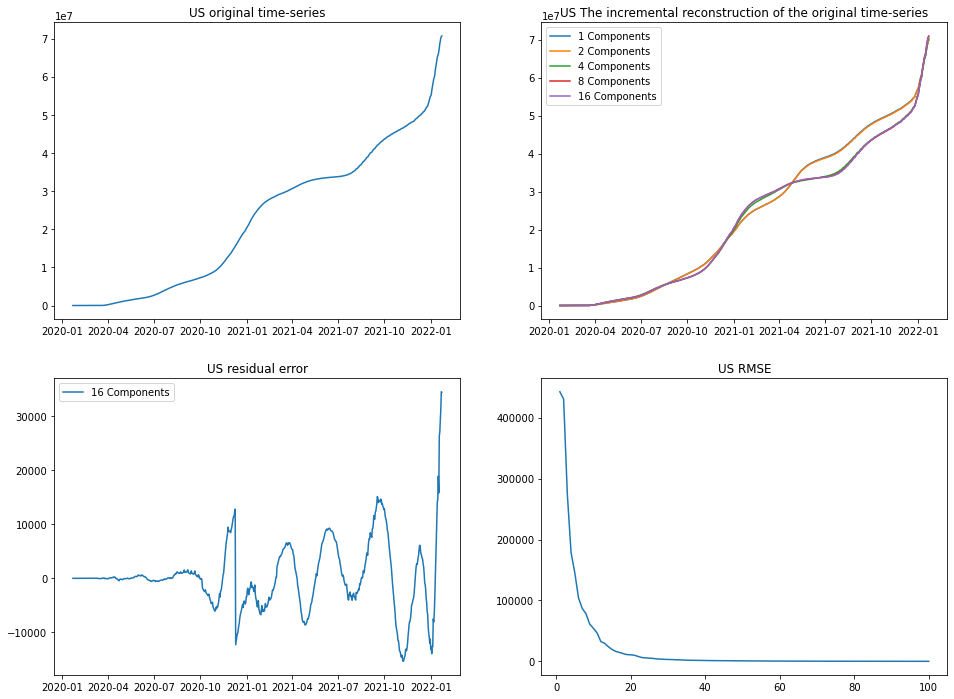

In [22]:
# Test function by 'US'
plot_country_figures2(df, 'US')

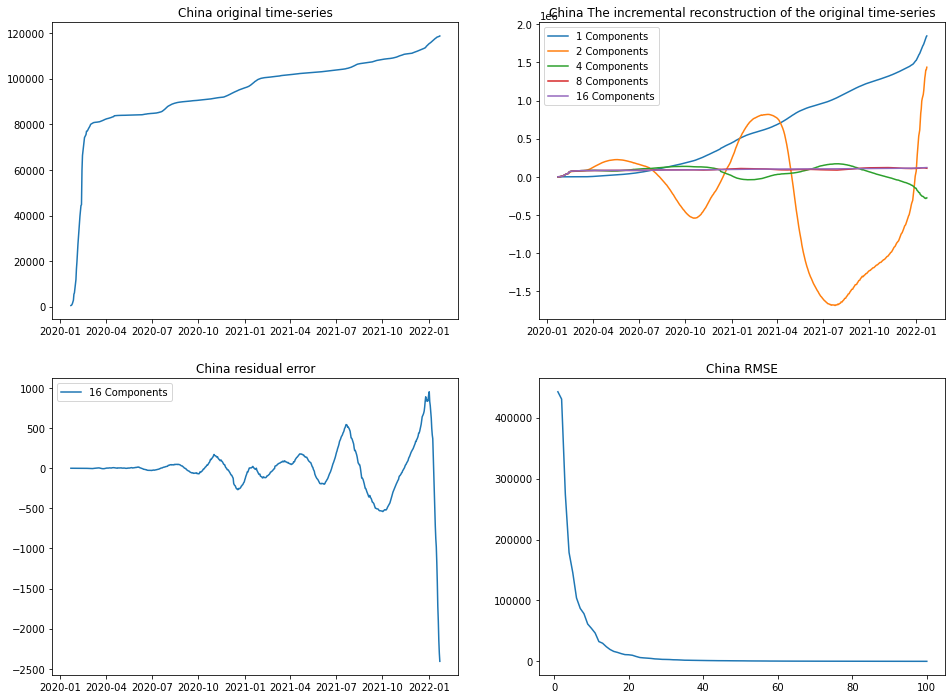

In [23]:
# Test function by 'China'
plot_country_figures2(df, 'China')

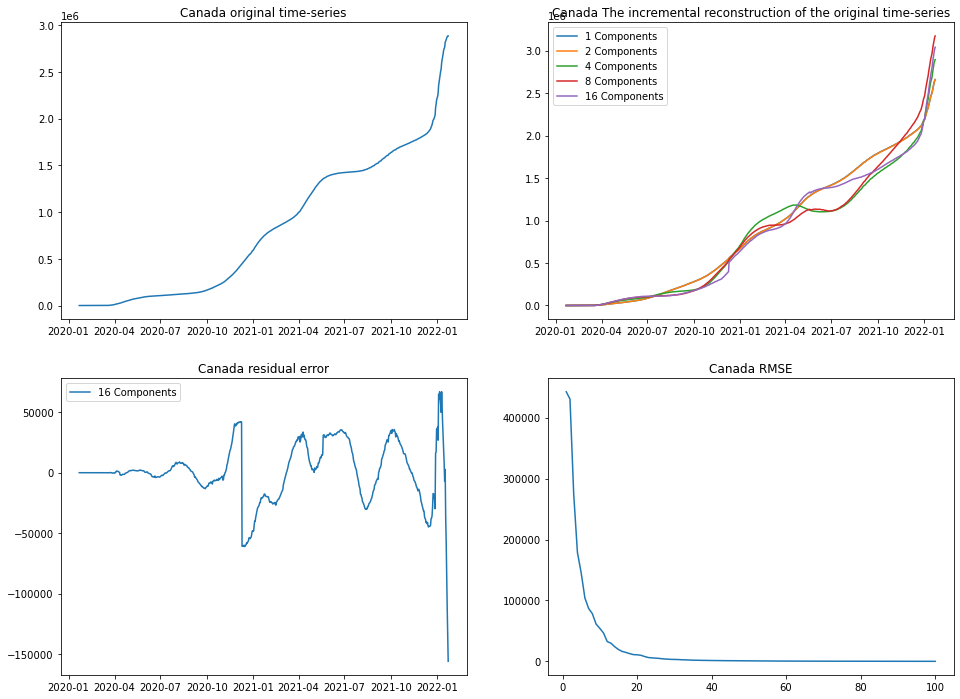

In [24]:
# Test function by 'Canada'
plot_country_figures2(df, 'Canada')

In [25]:
## Explain if standardization or covariance computation is required for this part.[1]

'''
Yes. The standardization process for SVD should be required. But the covariance is no more needs to be calculated 
in the SVD. We need the standardization process because the different scale effect will hurt the results and 
singular values if we do not do standardization. 
'''

'\nYes. The standardization process for SVD should be required. But the covariance is no more needs to be calculated \nin the SVD. We need the standardization process because the different scale effect will hurt the results and \nsingular values if we do not do standardization. \n'

In [26]:
## Repeat part 3 and compare your PCA and SVD results. [1]

'''
The PCA and SVD back the same results from all countries' figures. I believe that both methods will return the same
results.
'''

"\nThe PCA and SVD back the same results from all countries' figures. I believe that both methods will return the same\nresults.\n"

# Part 5: Fashion-MNIST dataset [3 Marks]
Fashion-MNIST is a dataset for clothes. 
Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. You can take a better look at this dataset in this [link](https://www.openml.org/d/40996) 

In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Create a new dataset by selecting images from *only* three categories (three distinct labels). 
    * To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. why? **[0.25]**
* Compute Eigenvectors and Eigenvalues using SVD. **[0.25]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.5]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ th principal components. **[0.5]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the items. **[0.5]**
* Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, you can share the eigenvectors (some of them) and projections with them, and thay can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[1]**
  * Hint: compare the dataset size with a case where we only use some principal components and projections.

In [27]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import wget
import math

In [28]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

Label is: Bag


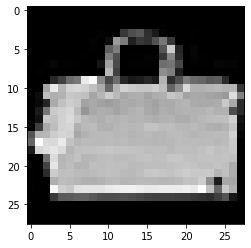

In [29]:
plt.gray() 
ind = 99
plt.imshow(x.loc[ind].values.reshape(28,28)) 
print ("Label is:", target_encoding[int(y[ind])])
plt.show() 

In [30]:
# Create a new dataset by selecting images from only three categories (three distinct labels)
df_5 = pd.concat([x[y.values == '1'], x[y.values == '2'],x[y.values == '7']], axis=0, ignore_index=True)
df_5

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,...,173.0,188.0,107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
### YOUR CODE HERE ###
## Part_5.1

def pca(x):
    
    # Standardzing data
    SS = StandardScaler()
    x_std = SS.fit_transform(x)
    
    # Calculate the covariance matrix
    mu = x_std.mean(axis=0)
    X = x_std - mu
    n,m = X.shape
    C = X.T @ X/(n-1) 
    
    # SVD to find eigenvalue and eigenvectors
    u, s, vh = np.linalg.svd(C, full_matrices=True)
    eigenValues,eigenVectors = s,vh
    
    # sort eigenVectors in descending order by their eigenValue
    idx = np.argsort(-eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[idx,:].T
    
    return eigenValues,eigenVectors,mu

In [32]:
# It is better to choose items that are similar in shape. why? [0.25]
'''
Selecting items in similar in shape can help the model reduces the RMSE. And the lower RMSE, the better the model.
'''

'\nSelecting items in similar in shape can help the model reduces the RMSE. And the lower RMSE, the better the model.\n'

In [33]:
# compute eigenvalue and eigenvectors by function
eigenValues,eigenVectors,mu = pca(df_5)

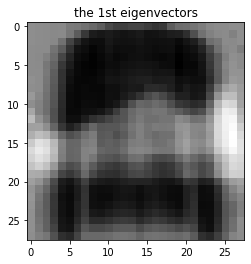

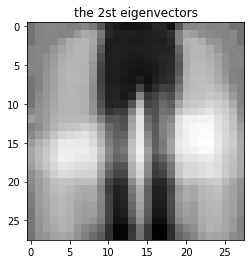

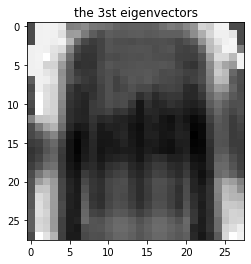

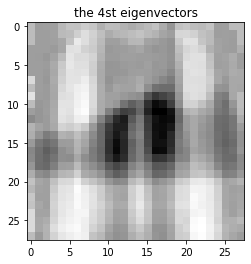

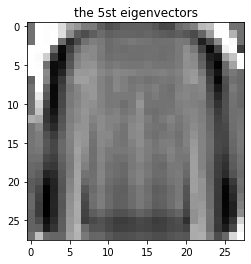

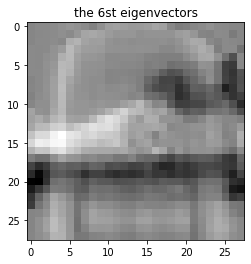

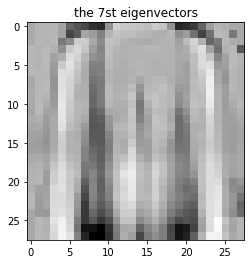

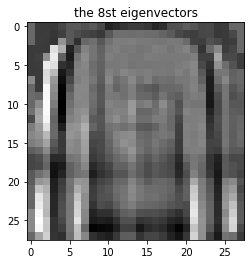

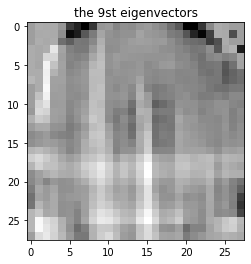

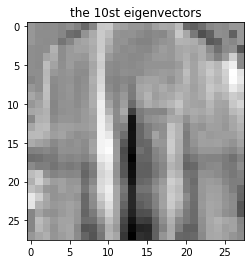

In [34]:
## Part_5.2
# Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? 

for i in range(10):

    plt.imshow(eigenVectors[:,i].reshape(28,28))
    plt.title('the {}st eigenvectors'.format(i+1))
    plt.show()

In [35]:
'''
The trends I observe is that the images get clear when the eigenvector value increases.
'''

'\nThe trends I observe is that the images get clear when the eigenvector value increases.\n'

In [36]:
## Part_5.3
## plots a random image from the dataset
rnd = int(np.random.uniform(0,281)) # there are 305 oberservations in the dataset
rnd_x = df_5.loc[rnd]

In [37]:
def plot_reconstruct(n):
    P = np.dot (rnd_x - mu , eigenVectors[:,:n])
    R = np.dot (P , eigenVectors[:,:n].T) + mu
    
    plt.imshow(R.reshape(28,28))
    plt.title("Reconstruction: "+ str(n) + " Components" )
    plt.show()

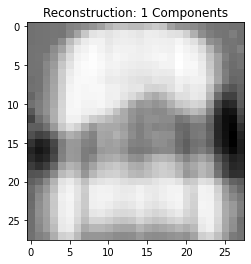

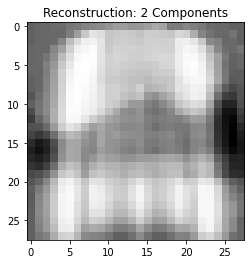

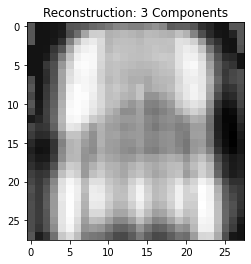

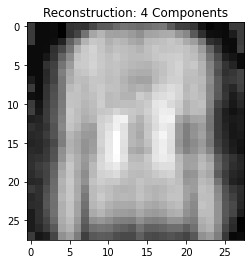

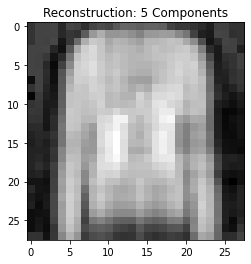

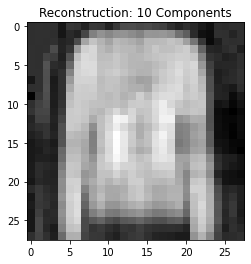

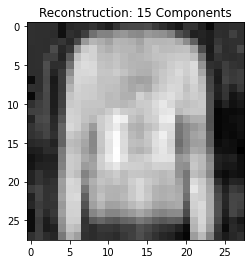

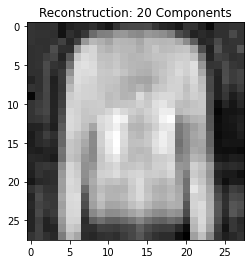

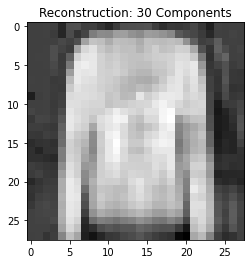

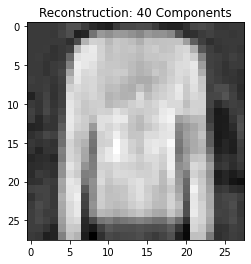

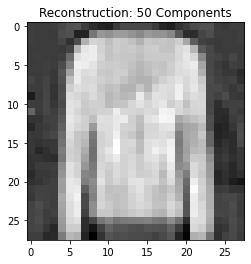

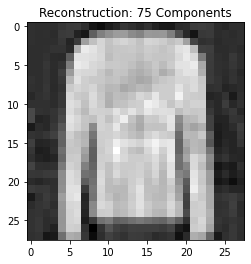

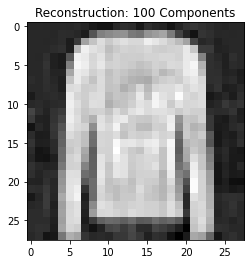

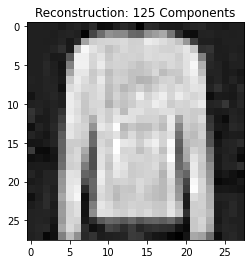

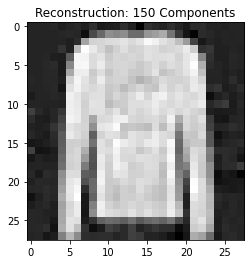

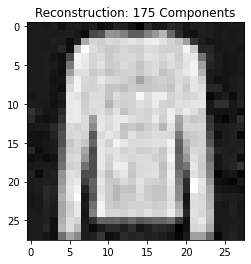

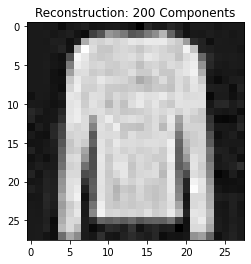

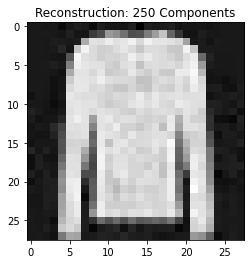

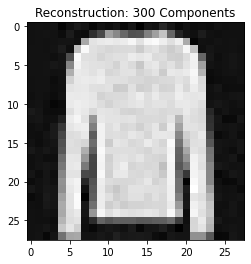

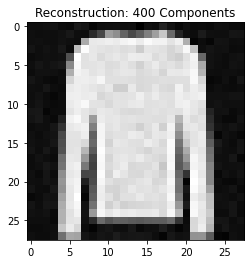

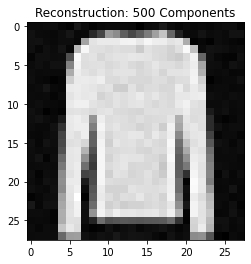

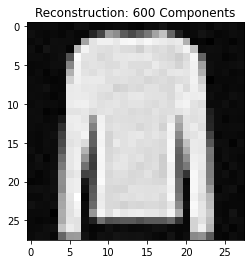

In [38]:
## Part_5.4
Number_of_Components = [1,2,3,4,5,10,15,20,30,40,50,75,100,125,150,175,200,250,300,400,500,600]
for  n in Number_of_Components:
    plot_reconstruct(n)

In [39]:
'''
Generally speaking, about 100 components are needed that can guarantee that we can identify the items. 

But in fact, if the random image selected is "Trouser" or "Sneaker," needs less components to identify. 
Identifying "Pullover" is a little bit more difficult than the other two types. The reason caused this 
may be because different pullovers have different patterns, and this leads to needing more components to 
make sure the item identified is "Pullover"
'''

'\nGenerally speaking, about 100 components are needed that can guarantee that we can identify the items. \n\nBut in fact, if the random image selected is "Trouser" or "Sneaker," needs less components to identify. \nIdentifying "Pullover" is a little bit more difficult than the other two types. The reason caused this \nmay be because different pullovers have different patterns, and this leads to needing more components to \nmake sure the item identified is "Pullover"\n'

In [40]:
## Part_5.5

compression_ratio = (784*1000)/(100*784 + 100 * 1000)
print('the compression ratio: ',compression_ratio )

the compression ratio:  4.394618834080718


In [41]:
'''
The total number of samples is equal with 1000 times different 784 pixel is 784000. From the last part,
We need about 100 comoponents to identify the item. Thus the compression_ratio is calculated by above.

'''

'\nThe total number of samples is equal with 1000 times different 784 pixel is 784000. From the last part,\nWe need about 100 comoponents to identify the item. Thus the compression_ratio is calculated by above.\n\n'

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

